<a href="https://colab.research.google.com/github/LikeMattorSomething/FutureTalentsProjects/blob/main/GraceDataMLTests_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data PreProcessing

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

GraceData = pd.read_csv("/content/drive/MyDrive/Future Talents Data/Grace_All years combined 08-07-2025.csv")

GraceData.info

GraceData = GraceData[GraceData['Diabetes'] != '#NULL!'] # Removed bad data with no diabetes
GraceData = GraceData[GraceData['Diabetes'] != '-1']

DiabeticSamples = GraceData[GraceData["Diabetes"] == '2']

GraceData['Country'] = pd.factorize(GraceData['Country'])[0] + 1 # Converts 'Country' column to numerical

X = GraceData.drop(columns=["Diabetes","seriali"])
y = GraceData["Diabetes"]


# OVERSAMPLING

DataOversample = True
print("DataOversample: ",DataOversample)

if DataOversample:
  from imblearn.over_sampling import RandomOverSampler

  print("Shape before oversampling:", X.shape, y.shape)
  print("Count of '1' in y:", (y == '2').sum())
  print("Count of '2' in y:", (y == '1').sum())

  ros = RandomOverSampler(random_state=0,sampling_strategy=1)
  X, y = ros.fit_resample(X, y)

  print("Shape after oversampling:", X.shape, y.shape)
  print("Count of '1' in y:", (y == '2').sum())
  print("Count of '2' in y:", (y == '1').sum())



print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

DataOversample:  True
Shape before oversampling: (4460, 51) (4460,)
Count of '1' in y: 251
Count of '2' in y: 4209
Shape after oversampling: (8418, 51) (8418,)
Count of '1' in y: 4209
Count of '2' in y: 4209
(8418, 51)
(8418,)


# Models

In [3]:
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,classification_report,precision_score,recall_score


# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ModelSelection = int(input("1 nearest neighbour, 2 decision tree, 3 random forest: "))
DefaultParameters = int(input("1 Baseline Parameters, 2 Grid Search: "))

if ModelSelection == 1:
  if DefaultParameters == 2:
    parameters = {"n_neighbors":range(1,30)}
  else:
    parameters = {}
  modelType = KNeighborsClassifier(weights="distance")

elif ModelSelection == 2:
  if DefaultParameters == 2:
    parameters = {"max_depth":range(1,30),'max_features': range(1,30)} # Parameters for decision tree
  else:
    parameters = {}
  modelType = DecisionTreeClassifier()

elif ModelSelection == 3:
  if DefaultParameters == 2:
    parameters = {"n_estimators": range(1,10),"max_depth": range(1,30),"max_features": range(1,10)} # Parameters for random forest (estimators 181)
    #parameters = {"n_estimators": range(1,10),"max_depth": range(1,30),"max_features": range(1,30)} # Parameters for random forest (estimators 181)
  elif DefaultParameters == 3:# Secret Third option so we dont have to do a grid search each time
    parameters = {'max_depth': (19,20), 'max_features': (1,2), 'n_estimators': (8,9)}
  else:
    parameters = {}
  modelType = RandomForestClassifier(random_state=40,verbose=1)

else:
  print("Invalid input")

GSD = GridSearchCV(modelType,parameters, scoring='accuracy')#scoring='f1_micro')

GSD.fit(X_train,y_train) # Fit on scaled data
print("Accuracy",GSD.best_estimator_.score(X_test,y_test)) # Score on scaled data
print("Precision",precision_score(GSD.predict(X_test),y_test,average='macro'))
print("Recall",recall_score(GSD.predict(X_test),y_test,average='macro'))
print("F1 score",f1_score(GSD.predict(X_test),y_test,average='macro'))

target_labels = ['Non-diabetic', 'Diabetic']
print(classification_report(y_test, GSD.predict(X_test), target_names=target_labels))

print(GSD.best_params_)

1 nearest neighbour, 2 decision tree, 3 random forest: 3
1 Baseline Parameters, 2 Grid Search: 3


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

Accuracy 0.998812351543943
Precision 0.9988290398126464
Recall 0.9987980769230769
F1 score 0.998812148811514
              precision    recall  f1-score   support

Non-diabetic       1.00      1.00      1.00       854
    Diabetic       1.00      1.00      1.00       830

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684

{'max_depth': 20, 'max_features': 1, 'n_estimators': 8}


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


# Model Performance Comparison

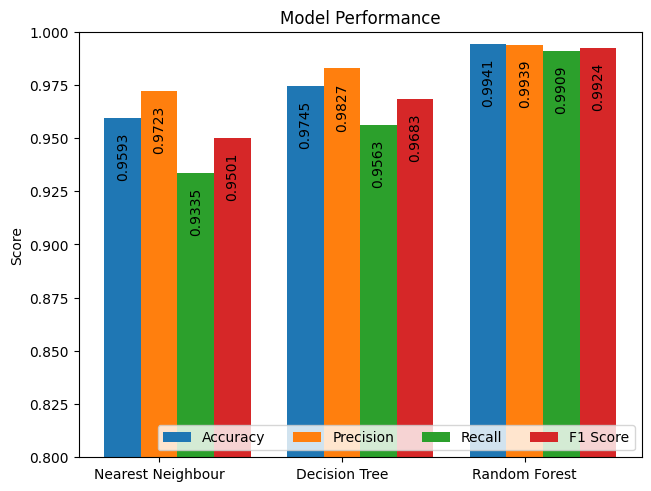

In [ ]:
import matplotlib.pyplot as plt
import numpy as np




Models = ("Nearest Neighbour","Decision Tree","Random Forest")
#ModelPerformance = {'Accuracy':(0.98,0.98,1),'Precision':(0.981,0.98,1),'Recall':(0.981,0.98,1),'F1 Score':(0.981,0.98,1)}
ModelPerformance = {'Accuracy':(0.9593,0.9745,0.9941),'Precision':(0.9723,0.9827,0.9939),'Recall':(0.9335,0.9563,0.9909),'F1 Score':(0.9501,0.9683,0.9924)}


x = np.arange(len(Models))
#width=0.25
width=0.20
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in ModelPerformance.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=-45,rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Performance')
ax.set_xticks(x + width, Models)
ax.legend(loc='lower right', ncols=4)
ax.set_ylim(0.8, 1)

plt.show()

# Confusion Matrix

RandomForestClassifier(random_state=40, verbose=1)


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


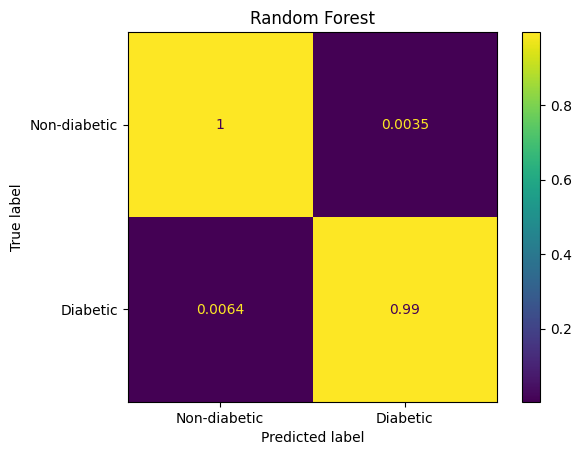


0.9957591178965225


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

PredictedResults = GSD.predict(X_test) # Predict on scaled data
ActualResults = y_test

CMlabels = ['1','2'] # Labels to match the values in y_test
DisplayLabels = ["Non-diabetic","Diabetic"] # Labels to display on the plot

cm = confusion_matrix(ActualResults, PredictedResults)
disp = ConfusionMatrixDisplay.from_estimator(GSD, X_test, y_test, normalize="true", labels=CMlabels, display_labels=DisplayLabels) # Display using scaled data and updated display_labels




print(modelType)
plt.title("Random Forest")
#plt.title("Random Forest baseline parameters")
plt.show()

print("")
print(GSD.best_estimator_.score(X_test,y_test))

# myClassifiers = pd.Series(GSD.best_estimator_.feature_importances_, index=X_train.columns)

# ROC Curve and AUC

AUC - ROC Score: 1.00
Accuracy: 0.99
Precision: 0.98
Recall: 0.99
F1 Score: 0.99
[0.         0.         0.00115473 0.00115473 0.00577367 0.01154734
 0.04387991 0.11893764 0.36374134 1.        ]
[0.         0.88178914 0.96485623 0.98722045 0.99361022 1.
 1.         1.         1.         1.        ]


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


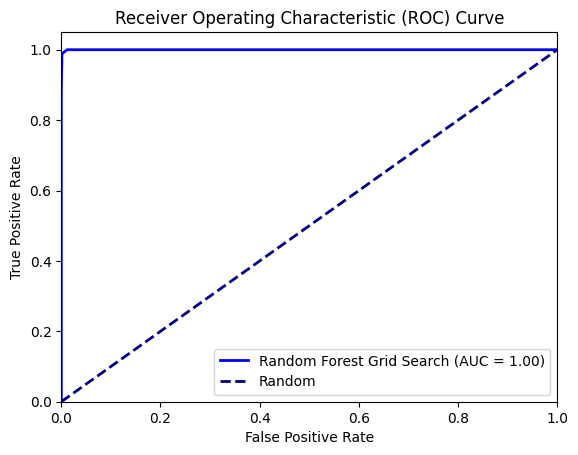

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = GSD.predict_proba(X_test)[:, 1]
y_pred = GSD.predict(X_test)


roc_auc = roc_auc_score(y_test, y_pred_proba)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='2')
recall = recall_score(y_test, y_pred, pos_label='2')
f1 = f1_score(y_test, y_pred, pos_label='2')

print(f"AUC - ROC Score: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='2')
roc_auc_plot = auc(fpr, tpr)



print(fpr)
print(tpr)


#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html






plt.figure()
#plt.plot(fpr, tpr, color='darkorange', lw=2, label='Oversampled (area = %0.2f)' % roc_auc_plot)

plt.plot(fpr, tpr, color='blue', lw=2, label='Random Forest Grid Search (AUC = %0.2f)' % roc_auc_plot)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting Performance

/tmp/ipython-input-3631175510.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(y, testDF.iloc[0][y], width,color='#1f77b4')
/tmp/ipython-input-3631175510.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(y+width, testDF.iloc[1][y], width,color='#ff7f0e')


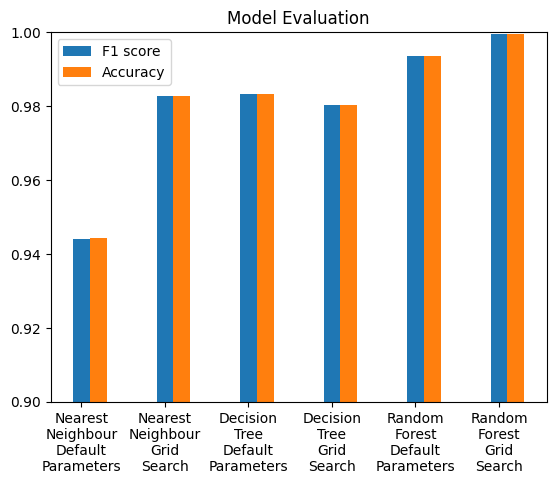

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

#print(classification_report(y_test,GSD.predict(X_test)))


ModelPerformanceResults = {'Nearest Neighbour Default Parameters': [0.944083906637899,0.9441805225653207],'Nearest Neighbour Grid Search':[0.9827789455718623,0.9827790973871734],'Decision Tree Default Parameters':[0.9833728278041074,0.9833729216152018],'Decision Tree Grid Search':[0.9804032407366593,0.9804038004750594],'Random Forest Default Parameters':[0.9934675441965211,0.9934679334916865],'Random Forest Grid Search':[0.9994060649794538,0.9994061757719715]}
testDF = pd.DataFrame(data=ModelPerformanceResults)


width = 0.2
x = np.arange(6)

for y in range(6):
  # print(testDF.iloc[0][y])
  # print(testDF.iloc[1][y])

  plt.bar(y, testDF.iloc[0][y], width,color='#1f77b4')
  plt.bar(y+width, testDF.iloc[1][y], width,color='#ff7f0e')



#plt.bar(x, ModelPerformanceResults['With Oversampling'], width)
#plt.bar(x+width, ModelPerformanceResults['Random Forest'], width)


#plt.xticks(x, ['Nearest Neighbour Default Parameters','Nearest Neighbour Grid Search','Decision Tree Default Parameters','Decision Tree Grid Search','Random Forest Default Parameters','Random Forest Grid Search'],rotation=90)
plt.xticks(x, ['Nearest\nNeighbour\nDefault\nParameters','Nearest\nNeighbour\nGrid\nSearch','Decision\nTree\nDefault\nParameters','Decision\nTree\nGrid\nSearch','Random\nForest\nDefault\nParameters','Random\nForest\nGrid\nSearch'])

plt.legend(['F1 score','Accuracy'])

plt.ylim(0.9,1)

plt.title("Model Evaluation")
plt.show()


# Feature Importance

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


ValueError: 'yerr' (shape: (51,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (39,))

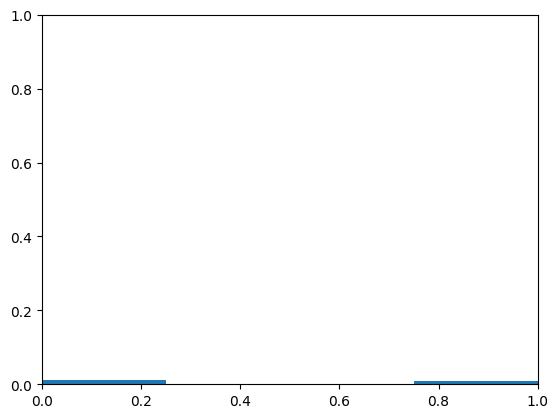

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = GSD.best_estimator_.feature_importances_

indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]

from sklearn.inspection import permutation_importance
result = permutation_importance(GSD.best_estimator_, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

forest_importances = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)

forest_importances_diet = pd.Series(result.importances_mean, index=X.columns)#.sort_values(ascending=False)
forest_importances_diet = forest_importances_diet.drop(labels=["SurveyYear",	"Ndays", "Age",	"Sex",	"BMI",	"Waist",	"ethgr5",	"ethgr2",	"Country",	"Glucose",	"HbA1C",	"GenHelf"])
forest_importances_diet = forest_importances_diet.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances_diet.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()



# SHAP Values